In [52]:
import math

class tekjuskattur_c:
    
    def __init__ (self, skattþrep = ([0.3145,(0,349_018)],[0.3795,(349_019,979_847)],[0.4625,(979_847,math.inf)])): # á eftir að ákveða parametrana
        self.skattþrep = skattþrep
    
    def personuafslattur_f (self, personuafslattur = 50_792, uppsafnadur_personuafslattur = 0):
        self.personuafslattur = personuafslattur
        self.uppsafnadur_personuafslattur = uppsafnadur_personuafslattur
        
    def stadgreidsla_f(self, laun = 0, lifeyrissjodur_p = 0.04): # hægt að bæta við séreignarsparnaði o.fl. seinna
        skattstofn = laun*(1-lifeyrissjodur_p)
        try:
            self.lifeyrissjodur += laun*lifeyrissjodur_p
        except:
            self.lifeyrissjodur = laun*lifeyrissjodur_p
        þrep = 0
        for i in range(3):
            if skattstofn > self.skattþrep[i][1][0]:
                þrep += 1
        i = 0
        stadgreidsla = 0
        while þrep > 0:
            try:
                if skattstofn >= self.skattþrep[i+1][1][0]:
                    stadgreidsla += (self.skattþrep[i][1][1] - self.skattþrep[i][1][0])*self.skattþrep[i][0]
                else:
                    stadgreidsla += (skattstofn - self.skattþrep[i][1][0])*self.skattþrep[i][0]
            except:
                stadgreidsla += (skattstofn - self.skattþrep[2][1][0])*self.skattþrep[2][0]
            i += 1
            þrep -= 1
        stadgreidsla -= (self.personuafslattur + self.uppsafnadur_personuafslattur)
        if stadgreidsla < 0:
            self.uppsafnadur_personuafslattur = self.personuafslattur
            try:
                self.endurgreidsla -= stadgreidsla
            except:
                self.endurgreidsla = -stadgreidsla
            self.laun_e_skatt_r = skattstofn + stadgreidsla
            return 0
        else:
            self.laun_e_skatt_r = skattstofn - stadgreidsla
            return stadgreidsla

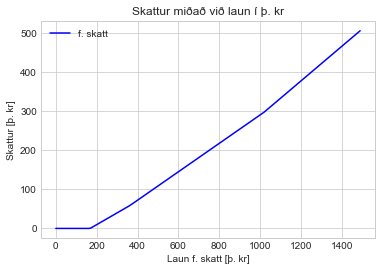

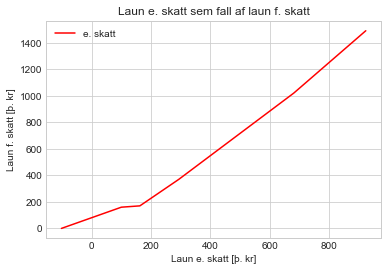

In [53]:
from matplotlib import pyplot as plt
import numpy as np

sat = [] # stadgreidsla ars tekjuskatts
laun_f_skatt = []
laun_e_skatt = []
for laun in range(0,1500_000,10_000):
    x = tekjuskattur_c()
    x.personuafslattur_f()
    heildar = 0
    for i in range(12):
        d = x.stadgreidsla_f(laun)
        heildar += round(d)
    try:
        if heildar - x.endurgreidsla < 0:
            sat.append(0)
        else:
            sat.append((heildar - round(x.endurgreidsla))/12_000)
    except:
        sat.append(heildar/12_000)  
    laun_f_skatt.append(laun/1_000)
    laun_e_skatt.append(x.laun_e_skatt_r/1_000)

sat_np = np.array(sat)
laun_f_skatt_np = np.array(laun_f_skatt)
laun_e_skatt_np = np.array(laun_e_skatt)

plt.plot(laun_f_skatt_np, sat_np, "-b", label = "f. skatt")
plt.legend(loc="upper left")
plt.title("Skattur miðað við laun í þ. kr")
plt.xlabel("Laun f. skatt [þ. kr]")
plt.ylabel("Skattur [þ. kr]")
plt.show()

plt.plot(laun_e_skatt_np, laun_f_skatt_np, "-r", label = "e. skatt")
plt.legend(loc="upper left")
plt.title("Laun e. skatt sem fall af laun f. skatt")
plt.xlabel("Laun e. skatt [þ. kr]")
plt.ylabel("Laun f. skatt [þ. kr]")
plt.show()